In [11]:
import torch
import matplotlib.pyplot as plt

from lib.data import CityscapesDataModule
from lib.models import Model


snapshot = torch.load("exp/cityscapes_default_exp0/last.ckpt")
print(snapshot["epoch"])

state_dict = {
    k.replace("model.", ""): v
    for k, v in snapshot["state_dict"].items()
    if k.startswith("model.")
}

model = Model(classification_classes=14, localization_classes=3)
model.load_state_dict(state_dict)
model.eval()

dm = CityscapesDataModule(root="data/cityscapes")
dm.setup("evaluate")

with torch.no_grad():
    for idx, batch in enumerate(dm.val_dataloader()):
        if idx == 0:
            classification, centerness, regression = model(batch[0])
            break

24


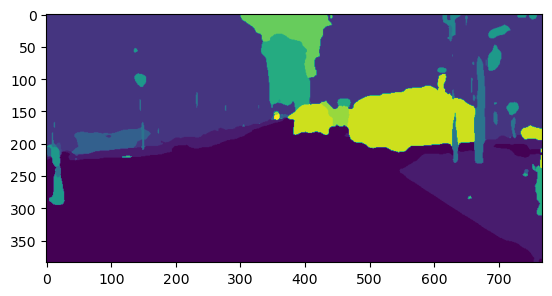

In [12]:
plt.imshow(classification.argmax(dim=1)[0])

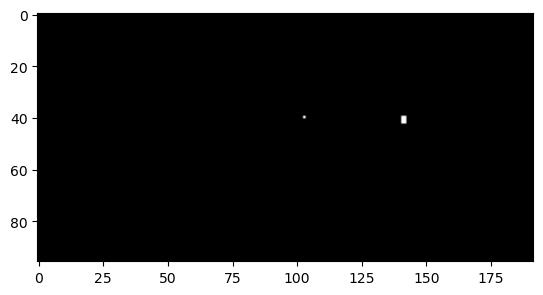

In [15]:
plt.imshow(centerness.sigmoid()[0][1] > 0.5, cmap="gray")